## Import libraries

In [1]:
#Enable plots to be displayed in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import statistics
import string
import regex as reg
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jith0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jith0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Mount to Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/gdrive/MyDrive/VIT/Tamil Argumentation/

/content/gdrive/MyDrive/VIT/Tamil Argumentation


In [ ]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Tamil Font

In [4]:
import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['./tamil_font']

for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

#default english
plt.rc('font', family='Sans Serif')

## Reading Data from a CSV File




In [5]:
twitter_df = pd.read_excel('Twitter_Argument_Dataset.xlsx',index_col=False)

In [6]:
new_column_names =  ['sno', 'Tweet', 'Date', 'Topic', 'Parent_Tweet', 'Language', 'Quality',
       'Stance', 'Argumentation', 'Comment', 'Responding_to_tone',
       'writer_characteristics', 'Remark', 'Relevancy']

twitter_df.columns = new_column_names

## Preliminary data inspection



In [7]:
twitter_df.shape

(1350, 14)

In [8]:
#Print general information about a DataFrame including the index dtype and columns, non-null values and memory usage
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sno                     1350 non-null   int64         
 1   Tweet                   1350 non-null   object        
 2   Date                    1350 non-null   datetime64[ns]
 3   Topic                   1350 non-null   object        
 4   Parent_Tweet            1350 non-null   object        
 5   Language                1350 non-null   object        
 6   Quality                 1350 non-null   object        
 7   Stance                  1350 non-null   object        
 8   Argumentation           1350 non-null   int64         
 9   Comment                 1350 non-null   int64         
 10  Responding_to_tone      1350 non-null   int64         
 11  writer_characteristics  1350 non-null   int64         
 12  Remark                  1350 non-null   int64   

In [9]:
# Use the .head(n) function to look at the first 'n' rows of our news dataframe. The default n is 5, we are now changing it to view the first 10 rows
twitter_df.head(10)


,sno,Tweet,Date,Topic,Parent_Tweet,Language,Quality,Stance,Argumentation,Comment,Responding_to_tone,writer_characteristics,Remark,Relevancy
0,1,"Bro imagine today is Friday , big star movie i...",2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Undetermined,0,1,0,0,0,Relevant
1,2,Dei unnoda akkarai TN mela not on others and w...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Against,0,1,0,1,0,Relevant
2,3,En ninga ivara matum mention panuringa naraiya...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,For,0,1,0,0,0,Relevant
3,4,What is happening in Thoothukudi is totally no...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,High,Against,1,1,0,0,0,Relevant
4,5,Ungaluku Sterlite protest prachanaya illa Bala...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Undetermined,0,0,1,0,0,Relevant
5,6,Ipo neenga tweet podra nala matram vara poguth...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Undetermined,0,1,0,0,0,Relevant
6,7,"bro., i would like you to see this too",2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Undetermined,0,0,0,0,0,Irrelevant
7,8,https://twitter.com/itisprashanth/status/99878...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,High,Against,1,1,0,0,0,Relevant
8,9,Shankar potathu unaku therila !@USER_32 potath...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Against,0,1,0,1,1,Relevant
9,10,Bro avaru already oru tweet potaru bro..About ...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Against,0,1,0,1,0,Relevant


In [10]:
twitter_df.columns

Index(['sno', 'Tweet', 'Date', 'Topic', 'Parent_Tweet', 'Language', 'Quality',
       'Stance', 'Argumentation', 'Comment', 'Responding_to_tone',
       'writer_characteristics', 'Remark', 'Relevancy'],
      dtype='object')

## Unique Values and Frequency

Topics :  ['Jalikattu' 'Free bus commute for women. boon or bane'
 'Covid vaccine - Boon or bane' 'Alcohol and Drugs' 'NEET: Boon or Bane'] 

Topic
Covid vaccine - Boon or bane                382
Jalikattu                                   346
Alcohol and Drugs                           286
Free bus commute for women. boon or bane    267
NEET: Boon or Bane                           69
Name: count, dtype: int64 



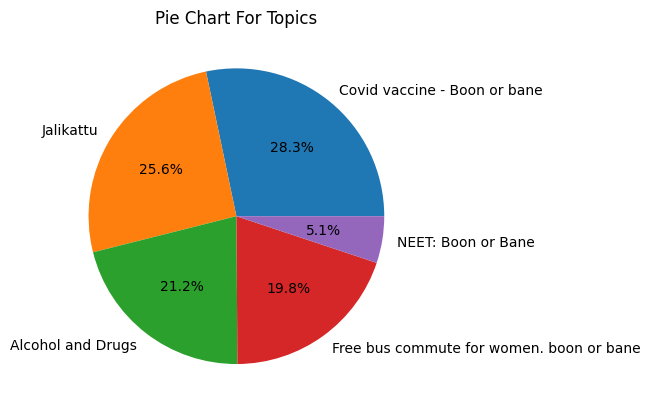

In [11]:
topics = twitter_df['Topic'].unique()

print("Topics : ",twitter_df['Topic'].unique(),"\n")
print(twitter_df['Topic'].value_counts(),"\n")

vc = twitter_df['Topic'].value_counts()

plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%')

plt.title('Pie Chart For Topics')
plt.show()

Parent Tweet Counts :  41 

parent tweets in each topic

                                     topics  Parent_Tweets
0                                 Jalikattu              8
1  Free bus commute for women. boon or bane              9
2              Covid vaccine - Boon or bane             12
3                         Alcohol and Drugs              7
4                        NEET: Boon or Bane              5


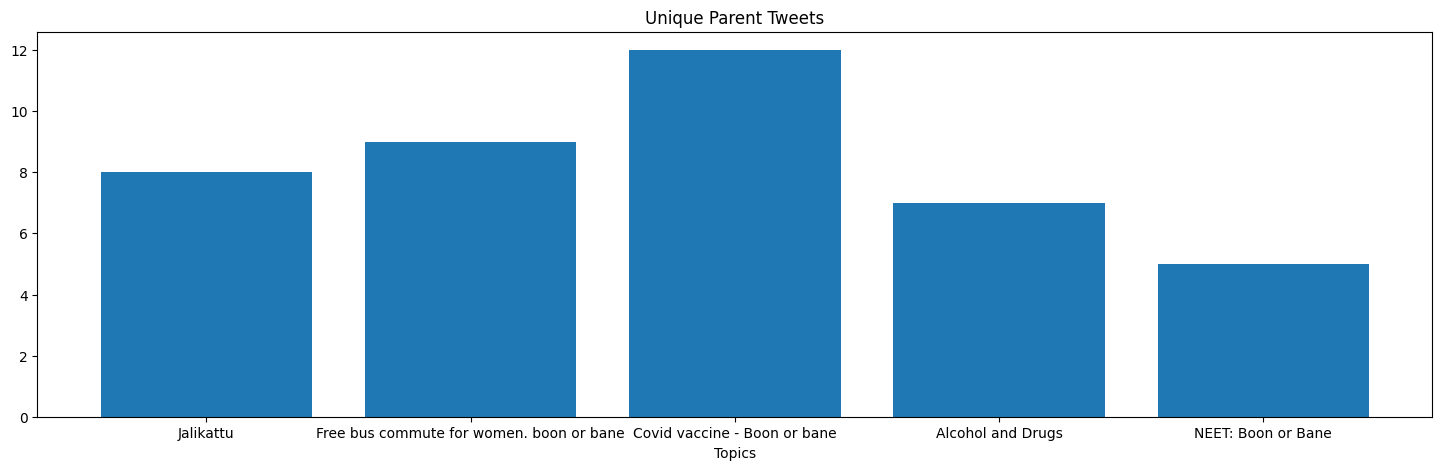

In [12]:
ptweets = twitter_df['Parent_Tweet'].unique()

print("Parent Tweet Counts : ",len(ptweets),"\n")

print("parent tweets in each topic\n")

p_t = []

for x in topics:
  sub_df = twitter_df[twitter_df['Topic']==x]
  p_t.append(len(sub_df['Parent_Tweet'].value_counts()))

pt_df = pd.DataFrame({"topics":topics,"Parent_Tweets":p_t})

print(pt_df)

plt.figure(figsize=(18,5))

plt.bar(pt_df["topics"],pt_df["Parent_Tweets"])

plt.xlabel('Topics')
plt.title('Unique Parent Tweets')

plt.show()

Language

Language
ENGLISH       623
CODE-MIXED    397
TAMIL         330
Name: count, dtype: int64 

Quality

Quality
Med     849
Low     304
High    197
Name: count, dtype: int64 

Stance

Stance
Against         626
Undetermined    437
For             287
Name: count, dtype: int64 

Argumentation

Argumentation
0    1139
1     211
Name: count, dtype: int64 

Comment

Comment
1    1047
0     303
Name: count, dtype: int64 

Responding_to_tone

Responding_to_tone
0    1112
1     238
Name: count, dtype: int64 

writer_characteristics

writer_characteristics
0    990
1    360
Name: count, dtype: int64 

Remark

Remark
0    1009
1     341
Name: count, dtype: int64 

Relevancy

Relevancy
Relevant      1251
Irrelevant      99
Name: count, dtype: int64 



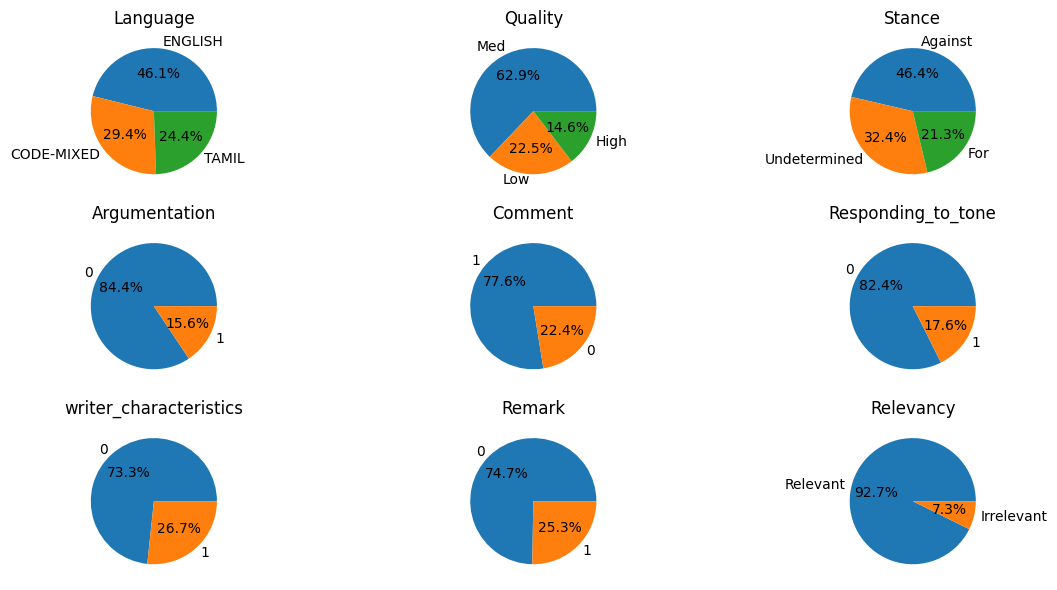

In [13]:
sub_cols = twitter_df.columns[5:]

fig, axs = plt.subplots(3, 3, figsize=(12, 6))

axs = axs.flatten()

for i in range(len(sub_cols)):
  vc = twitter_df[sub_cols[i]].value_counts()

  print(f"{sub_cols[i]}\n")
  print(vc,"\n")

  axs[i].pie(vc.values, labels=vc.index, autopct='%1.1f%%')
  axs[i].set_title(sub_cols[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

## Word Count

In [14]:
#To make it easier to reuse in the future, we can create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

**Mean and Mode of word count for the tweets**

Statistics of Word Count

Mean :  14
Mode :  4


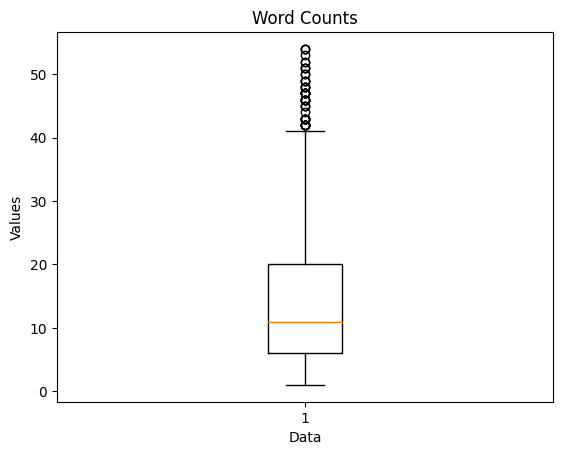

In [15]:
wc = 0
z =0
wc_list = []

translation_table = str.maketrans("", "", string.punctuation)

for x in twitter_df['Tweet']:
  z = word_count(x.translate(translation_table))
  wc+=z
  wc_list.append(z)

Average_WC = int(wc/twitter_df.shape[0])

print("Statistics of Word Count\n")
print("Mean : ",int(statistics.mean(wc_list)))
print("Mode : ",statistics.mode(wc_list))

plt.boxplot(wc_list)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Word Counts')

plt.show()

**Number of tweets with one, two and three words**

In [16]:
print("Number of Tweets with single word : ",wc_list.count(1))
print("Number of Tweets with two words : ",wc_list.count(2))
print("Number of Tweets with three words : ",wc_list.count(3))

Number of Tweets with single word :  46
Number of Tweets with two words :  51
Number of Tweets with three words :  67


**Average word count for each topic**

In [17]:
print("average word Count per Topic\n")

for x in topics:
  sub_df = twitter_df[twitter_df['Topic']==x]

  wc=0

  for x in sub_df['Tweet']:
    wc+= word_count(x.translate(translation_table))

  Average_WC = int(wc/sub_df.shape[0])
  print(sub_df.iloc[0,3]," : ",Average_WC)

average word Count per Topic

Jalikattu  :  14
Free bus commute for women. boon or bane  :  14
Covid vaccine - Boon or bane  :  12
Alcohol and Drugs  :  15
NEET: Boon or Bane  :  11


**Average word count for all other columns and classes**

Language 

ENGLISH  :  19
CODE-MIXED  :  9
TAMIL  :  11


Quality 

Med  :  12
High  :  24
Low  :  14


Stance 

Undetermined  :  11
Against  :  16
For  :  15


Argumentation 

0  :  12
1  :  24


Comment 

1  :  15
0  :  9


Responding_to_tone 

0  :  14
1  :  13


writer_characteristics 

0  :  13
1  :  16


Remark 

0  :  14
1  :  13


Relevancy 

Relevant  :  14
Irrelevant  :  12




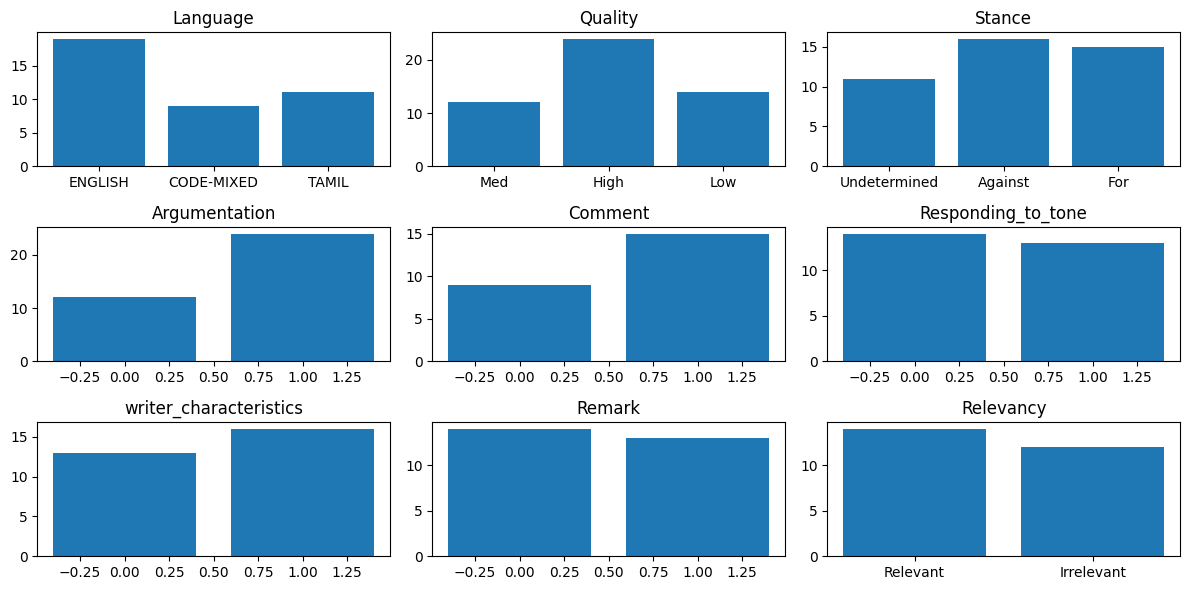

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(12, 6))

axs = axs.flatten()

i=0

for y in sub_cols:
  print(y,"\n")
  values = []

  for z in twitter_df[y].unique():
    sub_df = twitter_df[twitter_df[y]==z]

    wc=0

    for x in sub_df['Tweet']:
      wc+= word_count(x)

    Average_WC = int(wc/sub_df.shape[0])
    print(z," : ",Average_WC)
    values.append(Average_WC)

  print("\n")

  axs[i].bar(twitter_df[y].unique(),values)
  axs[i].set_title(y)
  i+=1

plt.tight_layout()   # Adjust the spacing between subplots

plt.show()

## Word frequencies


Calculate frequencies to determine the most common word in the corpus

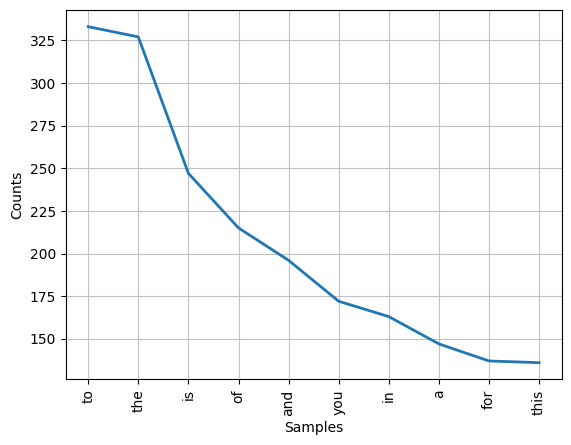

[('to', 333), ('the', 327), ('is', 247), ('of', 215), ('and', 196), ('you', 172), ('in', 163), ('a', 147), ('for', 137), ('this', 136), ('not', 118), ('are', 114), ('it', 98), ('u', 95), ('we', 76), ('be', 75), ('on', 70), ('will', 67), ('what', 65), ('with', 61)]


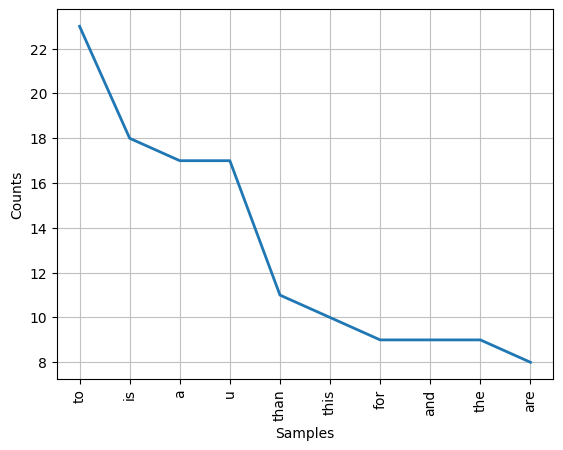

[('to', 23), ('is', 18), ('a', 17), ('u', 17), ('than', 11), ('this', 10), ('for', 9), ('and', 9), ('the', 9), ('are', 8), ('you', 8), ('your', 7), ('of', 7), ('i', 7), ('so', 7), ('what', 7), ('in', 6), ('not', 6), ('ur', 5), ('just', 5)]


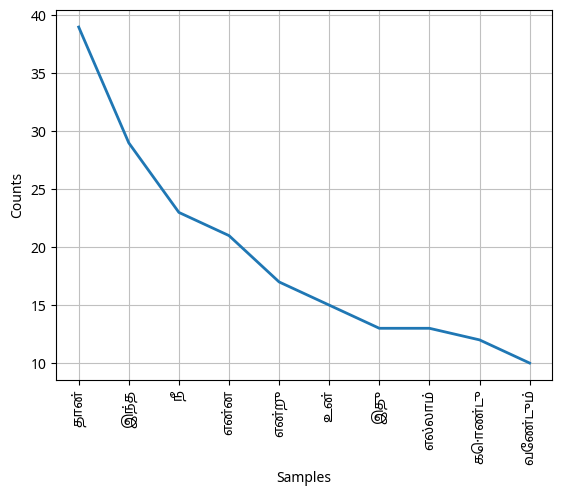

[('தான்', 39), ('இந்த', 29), ('நீ', 23), ('என்ன', 21), ('என்று', 17), ('உன்', 15), ('இது', 13), ('எல்லாம்', 13), ('கொண்டு', 12), ('வேண்டும்', 10), ('உள்ள', 9), ('ஏன்', 8), ('மீது', 8), ('இருந்து', 8), ('பல', 7), ('இதை', 6), ('விட', 6), ('அந்த', 6), ('அதை', 5), ('இன்னும்', 5)]


In [19]:
from nltk.corpus import stopwords
import re

#set stopwords
stopwords_set = stopwords.words('english')
stopwords_set.extend(["cnn", "'s", "a", "the","u","r","ur"])

#stopwords for Tamil
stopwords_tamil = pd.read_csv('./tamil_stopwords.txt')
stopwords_set_tamil = list(stopwords_tamil.iloc[:,0])

#create word tokens
tokenized_words = []
tamil_tokenized_words = []
code_mixed_tokenized_words = []

for i in range(twitter_df.shape[0]):
  if twitter_df['Language'][i] == "ENGLISH":
    tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

  elif twitter_df['Language'][i] == "TAMIL":
    translation_table = str.maketrans("", "", string.punctuation)
    tamil_tokenized_words+=word_tokenize(twitter_df['Tweet'][i].translate(translation_table))

  else:
    code_mixed_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

new_tokenized_words = []
new_tamil_tokenized_words = []
new_code_mixed_tokenized_words = []

for x in tokenized_words:
  if x.lower().strip() in stopwords_set:
    new_tokenized_words.append(x.lower().strip())

for x in tamil_tokenized_words:
  if x.strip() in stopwords_set_tamil:
    new_tamil_tokenized_words.append(x)

for x in code_mixed_tokenized_words:
  if x.lower().strip() in stopwords_set:
    new_code_mixed_tokenized_words.append(x.lower().strip())

tokenized_words = new_tokenized_words
tamil_tokenized_words = new_tamil_tokenized_words
code_mixed_tokenized_words = new_code_mixed_tokenized_words

all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

all_words=nltk.FreqDist(code_mixed_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Noto Sans Tamil')

all_words=nltk.FreqDist(tamil_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Sans Serif')

In [20]:
from nltk.corpus import stopwords
import re

#set stopwords
stopwords_set = stopwords.words('english')
stopwords_set.extend(["cnn", "'s", "a", "the","u","r","ur"])

#stopwords for Tamil
stopwords_tamil = pd.read_csv('./tamil_stopwords.txt')
stopwords_set_tamil = list(stopwords_tamil.iloc[:,0])

#create word tokens
tokenized_words = []
tamil_tokenized_words = []
code_mixed_tokenized_words = []

for i in range(twitter_df.shape[0]):
  if twitter_df['Language'][i] == "ENGLISH":
    tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

  elif twitter_df['Language'][i] == "TAMIL":
    translation_table = str.maketrans("", "", string.punctuation)
    tamil_tokenized_words+=word_tokenize(twitter_df['Tweet'][i].translate(translation_table))

  else:
    code_mixed_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

new_tokenized_words = []
new_tamil_tokenized_words = []
new_code_mixed_tokenized_words = []

for x in tokenized_words:
  if x.lower().strip() not in stopwords_set:
    new_tokenized_words.append(x.lower().strip())

for x in tamil_tokenized_words:
  if x.strip() not in stopwords_set_tamil:
    new_tamil_tokenized_words.append(x)

for x in code_mixed_tokenized_words:
  if x.lower().strip() not in stopwords_set:
    new_code_mixed_tokenized_words.append(x.lower().strip())

tokenized_words = new_tokenized_words
tamil_tokenized_words = new_tamil_tokenized_words
code_mixed_tokenized_words = new_code_mixed_tokenized_words

In [21]:
print(stopwords_set_tamil)

['என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்', 'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து', 'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்', 'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்', 'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன', 'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்', 'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்', 'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக', 'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்', 'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே', 'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற', 'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனினும்', 

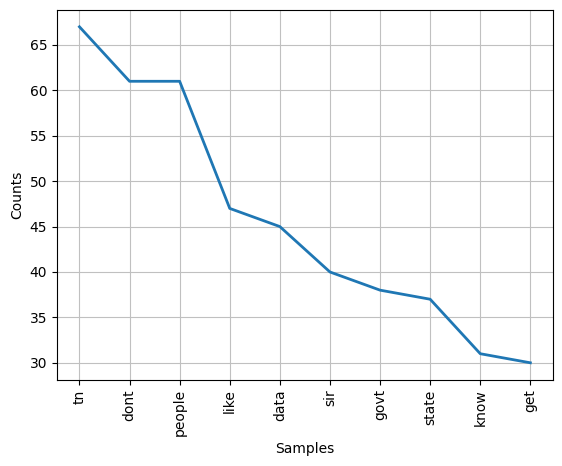

[('tn', 67), ('dont', 61), ('people', 61), ('like', 47), ('data', 45), ('sir', 40), ('govt', 38), ('state', 37), ('know', 31), ('get', 30), ('jallikattu', 28), ('population', 28), ('tasmac', 26), ('good', 25), ('tamil', 25), ('tamilnadu', 24), ('vaccine', 24), ('one', 23), ('free', 23), ('government', 22)]


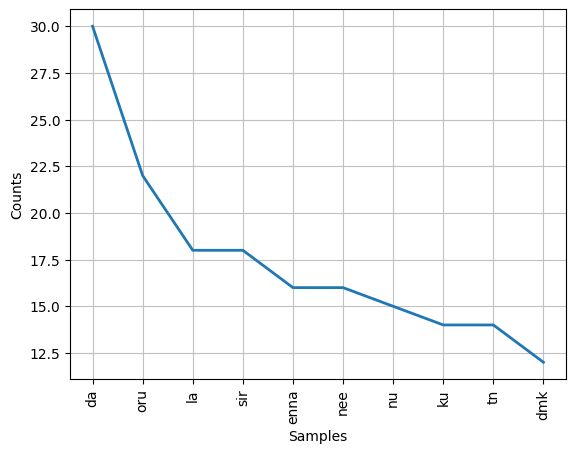

[('da', 30), ('oru', 22), ('la', 18), ('sir', 18), ('enna', 16), ('nee', 16), ('nu', 15), ('ku', 14), ('tn', 14), ('dmk', 12), ('tweet', 10), ('unaku', 10), ('ena', 10), ('review', 9), ('தன', 9), ('poi', 9), ('ah', 9), ('user_74', 9), ('ஒர', 9), ('dai', 8)]


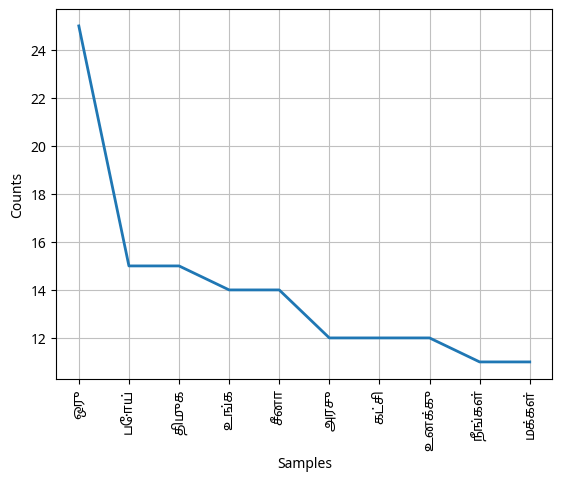

[('ஒரு', 25), ('போய்', 15), ('திமுக', 15), ('உங்க', 14), ('சீனா', 14), ('அரசு', 12), ('கட்சி', 12), ('உனக்கு', 12), ('நீங்கள்', 11), ('மக்கள்', 11), ('நாயே', 11), ('இல்லை', 11), ('பெண்களுக்கு', 10), ('பேருந்து', 10), ('உங்களுக்கு', 10), ('உண்டியல்', 10), ('நீங்க', 9), ('இல்லையா', 9), ('மாரி', 9), ('கோடி', 9)]


In [22]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

all_words=nltk.FreqDist(code_mixed_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Noto Sans Tamil')

all_words=nltk.FreqDist(tamil_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

**word CLoud**

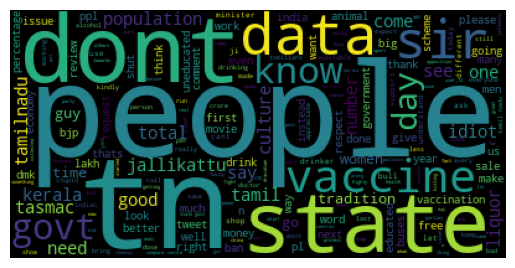

In [23]:
from wordcloud import WordCloud

tweets_text = ' '.join(tokenized_words)

english_wordcloud = WordCloud().generate(tweets_text)

plt.rc('font', family='Sans Serif')
plt.imshow(english_wordcloud)
plt.axis("off")
plt.show()

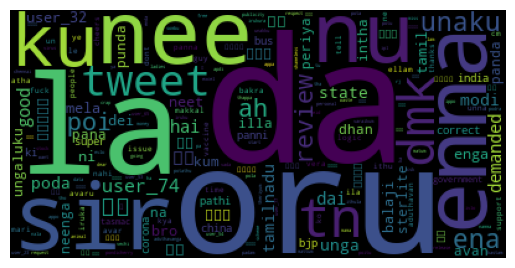

In [24]:
from wordcloud import WordCloud

tweets_text = ' '.join(code_mixed_tokenized_words)

code_mixed_wordcloud = WordCloud().generate(tweets_text)

plt.imshow(code_mixed_wordcloud)
plt.axis("off")
plt.show()

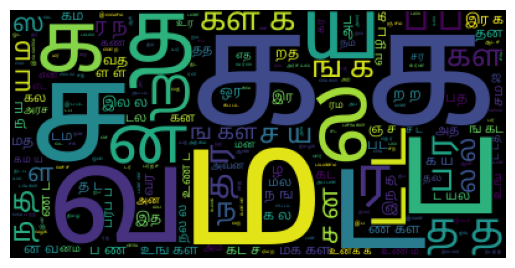

In [25]:
from wordcloud import WordCloud

font_paths = './tamil_font/NotoSansTamil-VariableFont_wdth,wght.ttf'

tweets_text = ' '.join(tamil_tokenized_words)

tamil_wordcloud = WordCloud(font_path=font_paths).generate(tweets_text)

plt.rc('font', family='Noto Sans Tamil')
plt.imshow(tamil_wordcloud)
plt.axis("off")
plt.show()

## Collocations


In [26]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

tokenized_words = [string for string in tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]
tamil_tokenized_words = [string for string in tamil_tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]
code_mixed_tokenized_words = [string for string in code_mixed_tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]

english_finder = BigramCollocationFinder.from_words(tokenized_words)
tamil_finder = BigramCollocationFinder.from_words(tamil_tokenized_words)
code_mixed_finder = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

tri_english_finder = TrigramCollocationFinder.from_words(tokenized_words)
tri_tamil_finder = TrigramCollocationFinder.from_words(tamil_tokenized_words)
tri_code_mixed_finder = TrigramCollocationFinder.from_words(code_mixed_tokenized_words)

#Using PMI scores to quantify and rank the BiGrams
print(english_finder.nbest(bigram_measures.pmi, 50))
print(tamil_finder.nbest(bigram_measures.pmi, 50))
print(code_mixed_finder.nbest(bigram_measures.pmi, 50))

print("\n\n")

#Using PMI scores to quantify and rank the TriGrams
print(tri_english_finder.nbest(trigram_measures.pmi, 50))
print(tri_tamil_finder.nbest(trigram_measures.pmi, 50))
print(tri_code_mixed_finder.nbest(trigram_measures.pmi, 50))

[('aagum', 'appo'), ('aariya', 'brahmin'), ('aashole', 'gay'), ('abandon', 'pplfor'), ('abusive', 'language'), ('ac', 'room'), ('accidents', 'suicides'), ('actual', 'illegal'), ('addict', 'agiruvanga'), ('adhere', 'prescribed'), ('admistration', 'karur'), ('advised', 'admitted'), ('agencies', 'ndrf'), ('aiming', 'trillion'), ('aka', 'koothadimai'), ('alcoholics', 'affect'), ('alcoholkaliug', 'startsstartedbetter'), ('alive', 'iz'), ('allaha', 'enjoy'), ('amendpcaactsoon', 'banpeta'), ('analytical', 'abilities'), ('anybody', 'doeslet'), ('apologize', 'patanjali'), ('appo', 'nenga'), ('apram', 'ena'), ('arivalayam', 'enterprises'), ('around', 'worldincluding'), ('ashame', 'posting'), ('aspiring', 'secure'), ('association', 'vellore'), ('atha', 'sollu'), ('augment', 'prospects'), ('australian', 'police'), ('authorities', 'driver'), ('auto', 'drivers'), ('avandha', 'oomura'), ('baadubiriyani', 'boyshut'), ('bakraeid', 'jallikkattu'), ('bakreed', 'carore'), ('banjallikattu', 'hehehe'), ('ba

## Word associations

In [27]:
from nltk import BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

print(english_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(tamil_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(code_mixed_finder.nbest(bigram_measures.likelihood_ratio, 20))

print("\n\n")

print(tri_english_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_tamil_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_code_mixed_finder.nbest(trigram_measures.likelihood_ratio, 20))

[('tamil', 'nadu'), ('arunachal', 'pradesh'), ('without', 'knowing'), ('free', 'bus'), ('jun', 'jun'), ('central', 'government'), ('stop', 'eating'), ('white', 'board'), ('demand', 'request'), ('stop', 'reviewing'), ('state', 'govt'), ('global', 'tender'), ('gon', 'na'), ('jesse', 'jackson'), ('non', 'veg'), ('tail', 'end'), ('vote', 'bank'), ('social', 'media'), ('economic', 'slowdown'), ('come', 'marina')]
[('படேல்', 'சிலைக்கு'), ('கேள்வி', 'கேட்க'), ('நடவடிக்கை', 'எடுக்க'), ('சிலைக்கு', 'கோடி'), ('அ', 'ஒழிக்குறோம்'), ('அன்புமணி', 'ராமதாஸ்'), ('இருந்தாங்களா', 'தட்'), ('உருட்டிட்டு', 'இருந்தாங்களா'), ('ஏமாத்துனது', 'கவர்மெண்ட்'), ('ஒழிக்குறோம்', 'வோட்'), ('சாய்', 'ராம்'), ('தட்', 'நானும்'), ('நானும்', 'ரௌடி'), ('போடுங்கன்னு', 'உருட்டிட்டு'), ('மருத்துவர்', 'அன்புமணி'), ('வோட்', 'போடுங்கன்னு'), ('இலவச', 'பேருந்து'), ('இதுல', 'கொடுமை'), ('காட்ட', 'வேண்டாம்'), ('கேட்க', 'துப்பு')]
[('fare', 'increase'), ('bus', 'fare'), ('ethuku', 'uyir'), ('fame', 'grudge'), ('grudge', 'go'), ('itispras

**Associations with specific words of interest**

In [28]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

topic_filter1 = lambda *w: 'jallikattu' not in w
topic_filter2 = lambda *w: 'alcohol' not in w
topic_filter3 = lambda *w: 'neet' not in w
topic_filter4 = lambda *w: 'covid' not in w
topic_filter5 = lambda *w: 'bus' not in w

#ENGLISH
finder1 = BigramCollocationFinder.from_words(tokenized_words)
finder2 = BigramCollocationFinder.from_words(tokenized_words)
finder3 = BigramCollocationFinder.from_words(tokenized_words)
finder4 = BigramCollocationFinder.from_words(tokenized_words)
finder5 = BigramCollocationFinder.from_words(tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

#CODE_MIXED
print("\n\n")
finder1 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder2 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder3 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder4 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder5 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

topic_filter1 = lambda *w: 'ஜல்லிக்கட்டு' not in w
topic_filter2 = lambda *w: 'மது' not in w
topic_filter3 = lambda *w: 'நீட்' not in w
topic_filter4 = lambda *w: 'கொரோனா' not in w
topic_filter5 = lambda *w: 'பஸ்' not in w

#TAMIL
print("\n\n")
finder1 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder2 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder3 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder4 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder5 = BigramCollocationFinder.from_words(tamil_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

[('anything', 'jallikattu'), ('jallikattu', 'protests'), ('abt', 'jallikattu'), ('commenting', 'jallikattu'), ('fyi', 'jallikattu'), ('hang', 'jallikattu'), ('jallikattu', 'calls'), ('jallikattu', 'hero'), ('jallikattu', 'jallikattuprotest'), ('jallikattu', 'ordinance')]
[('alcohol', 'consumption'), ('consuming', 'alcohol'), ('influence', 'alcohol'), ('alcohol', 'alternative'), ('alcohol', 'average'), ('alcohol', 'id'), ('alcohol', 'proper'), ('amount', 'alcohol'), ('banning', 'alcohol'), ('keralas', 'alcohol')]
[('cancel', 'neet'), ('neet', 'thirttu'), ('neet', 'exemption'), ('secret', 'neet'), ('talk', 'neet'), ('modi', 'neet'), ('neet', 'ban'), ('neet', 'tn')]
[('covid', 'warrior'), ('covid', 'pandemic'), ('supply', 'covid'), ('true', 'covid'), ('days', 'covid'), ('covid', 'vaccine')]
[('free', 'bus'), ('bus', 'pass'), ('bus', 'ticket'), ('levied', 'bus'), ('travelling', 'bus'), ('bus', 'daily'), ('bus', 'eh'), ('bus', 'fare'), ('bus', 'travel'), ('though', 'bus')]



[('jallikattu'

##Regex

In [29]:
match_1 = 0
match_2 = 0
match_3 = 0
match_4 = 0
match_5 = 0

for x in twitter_df["Tweet"]:
  match_1 += len(re.findall("jallikattu",x,flags=re.IGNORECASE))
  match_1 += len(re.findall("jalikattu",x,flags=re.IGNORECASE))
  match_1 += len(re.findall("ஜல்லிக்கட்டு",x,flags=re.IGNORECASE))

  match_2 += len(re.findall("நீட்",x,flags=re.IGNORECASE))
  match_2 += len(re.findall("NEET",x,flags=re.IGNORECASE))

  match_3 += len(re.findall("Covid",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("vaccine",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("கொரோனா",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("டோஸ்",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("தடுப்பூசி",x,flags=re.IGNORECASE))

  match_4 += len(re.findall("bus",x,flags=re.IGNORECASE))
  match_4 += len(re.findall("pass",x,flags=re.IGNORECASE))
  match_4 += len(re.findall("பஸ்",x,flags=re.IGNORECASE))

  match_5 += len(re.findall("alcohol",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("tasmac",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("liquor",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("மது",x,flags=re.IGNORECASE))

print("Jallikattu : ",match_1)
print("NEET : ",match_2)
print("Covid or Vaccine: ",match_3)
print("Bus or Pass : ",match_4)
print("Alcohol or Tasmac or Liquor : ",match_5)

Jallikattu :  51
NEET :  19
Covid or Vaccine:  80
Bus or Pass :  58
Alcohol or Tasmac or Liquor :  87


In [30]:
matches = 0

for x in twitter_df["Tweet"]:
  matches += len(re.findall("http",x))

print("Number of times a URL is provided as an evidence/ support : ",matches)

Number of times a URL is provided as an evidence/ support :  15


In [31]:
matches = 0

for x in twitter_df["Tweet"]:
  matches += len(re.findall("@USER",x))

print("Number of tags : ",matches)

Number of tags :  205


## Character Level Counts

<Axes: >

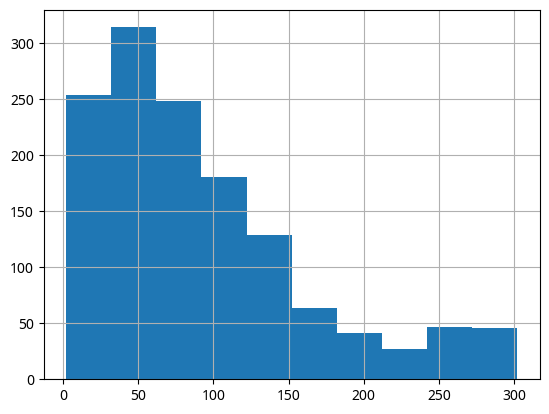

In [32]:
twitter_df["Tweet"].str.len().hist()

## Time Line of Tweets

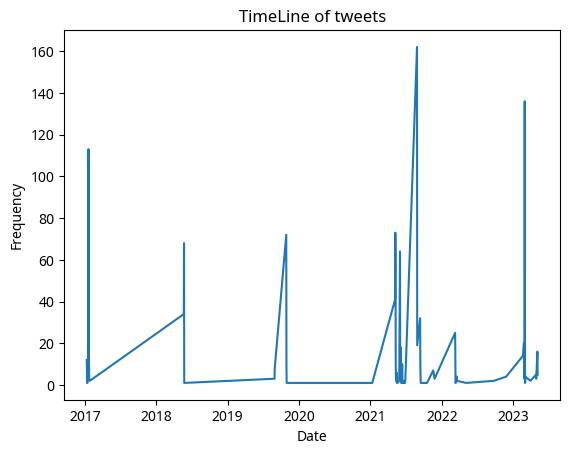

In [54]:
vc = twitter_df['Date'].value_counts()

dates = []

for x,y in zip(vc.index,vc.values):
    z = []
    z.append(x)
    z.append(y)
    dates.append(tuple(z))

dates = sorted(dates)

x_values = [t[0] for t in dates]
y_values = [t[1] for t in dates]

plt.plot(x_values,y_values)

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('TimeLine of tweets')
plt.show()